In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [237]:
train_data = os.path.join('./Combined/Train')
test_data = os.path.join('./Combined/Test')

In [238]:
activities = ['LAYING', 'SITTING', 'STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
activities_map = {i:activities[i-1] for i in range(1, 7)}

In [239]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
for activity in activities:
    folder = os.path.join(train_data,activity)
    data = os.listdir(folder)
    # print(len(data))
    for csv in data:
        df=pd.read_csv(os.path.join(train_data,activity,csv),header=0)
        x_train.append(df.values[:500])
        y_train.append(activity)
for activity in activities:
    folder = os.path.join(test_data,activity)
    data = os.listdir(folder)
    # print(len(data))
    for csv in data:
        df=pd.read_csv(os.path.join(test_data,activity,csv),header=0)
        x_test.append(df.values[:500])
        y_test.append(activity)
    

In [240]:
x_train=np.array(x_train)
y_train=np.array(y_train)
print(f"Shape of X_train = {x_train.shape}") 
print(f'Shape of y_train = {y_train.shape}')

x_test=np.array(x_test)
y_test=np.array(y_test)
print(f"Shape of X_test = {x_test.shape}")
print(f'Shape of y_test = {y_test.shape}')

Shape of X_train = (126, 500, 3)
Shape of y_train = (126,)
Shape of X_test = (54, 500, 3)
Shape of y_test = (54,)


## Question 1

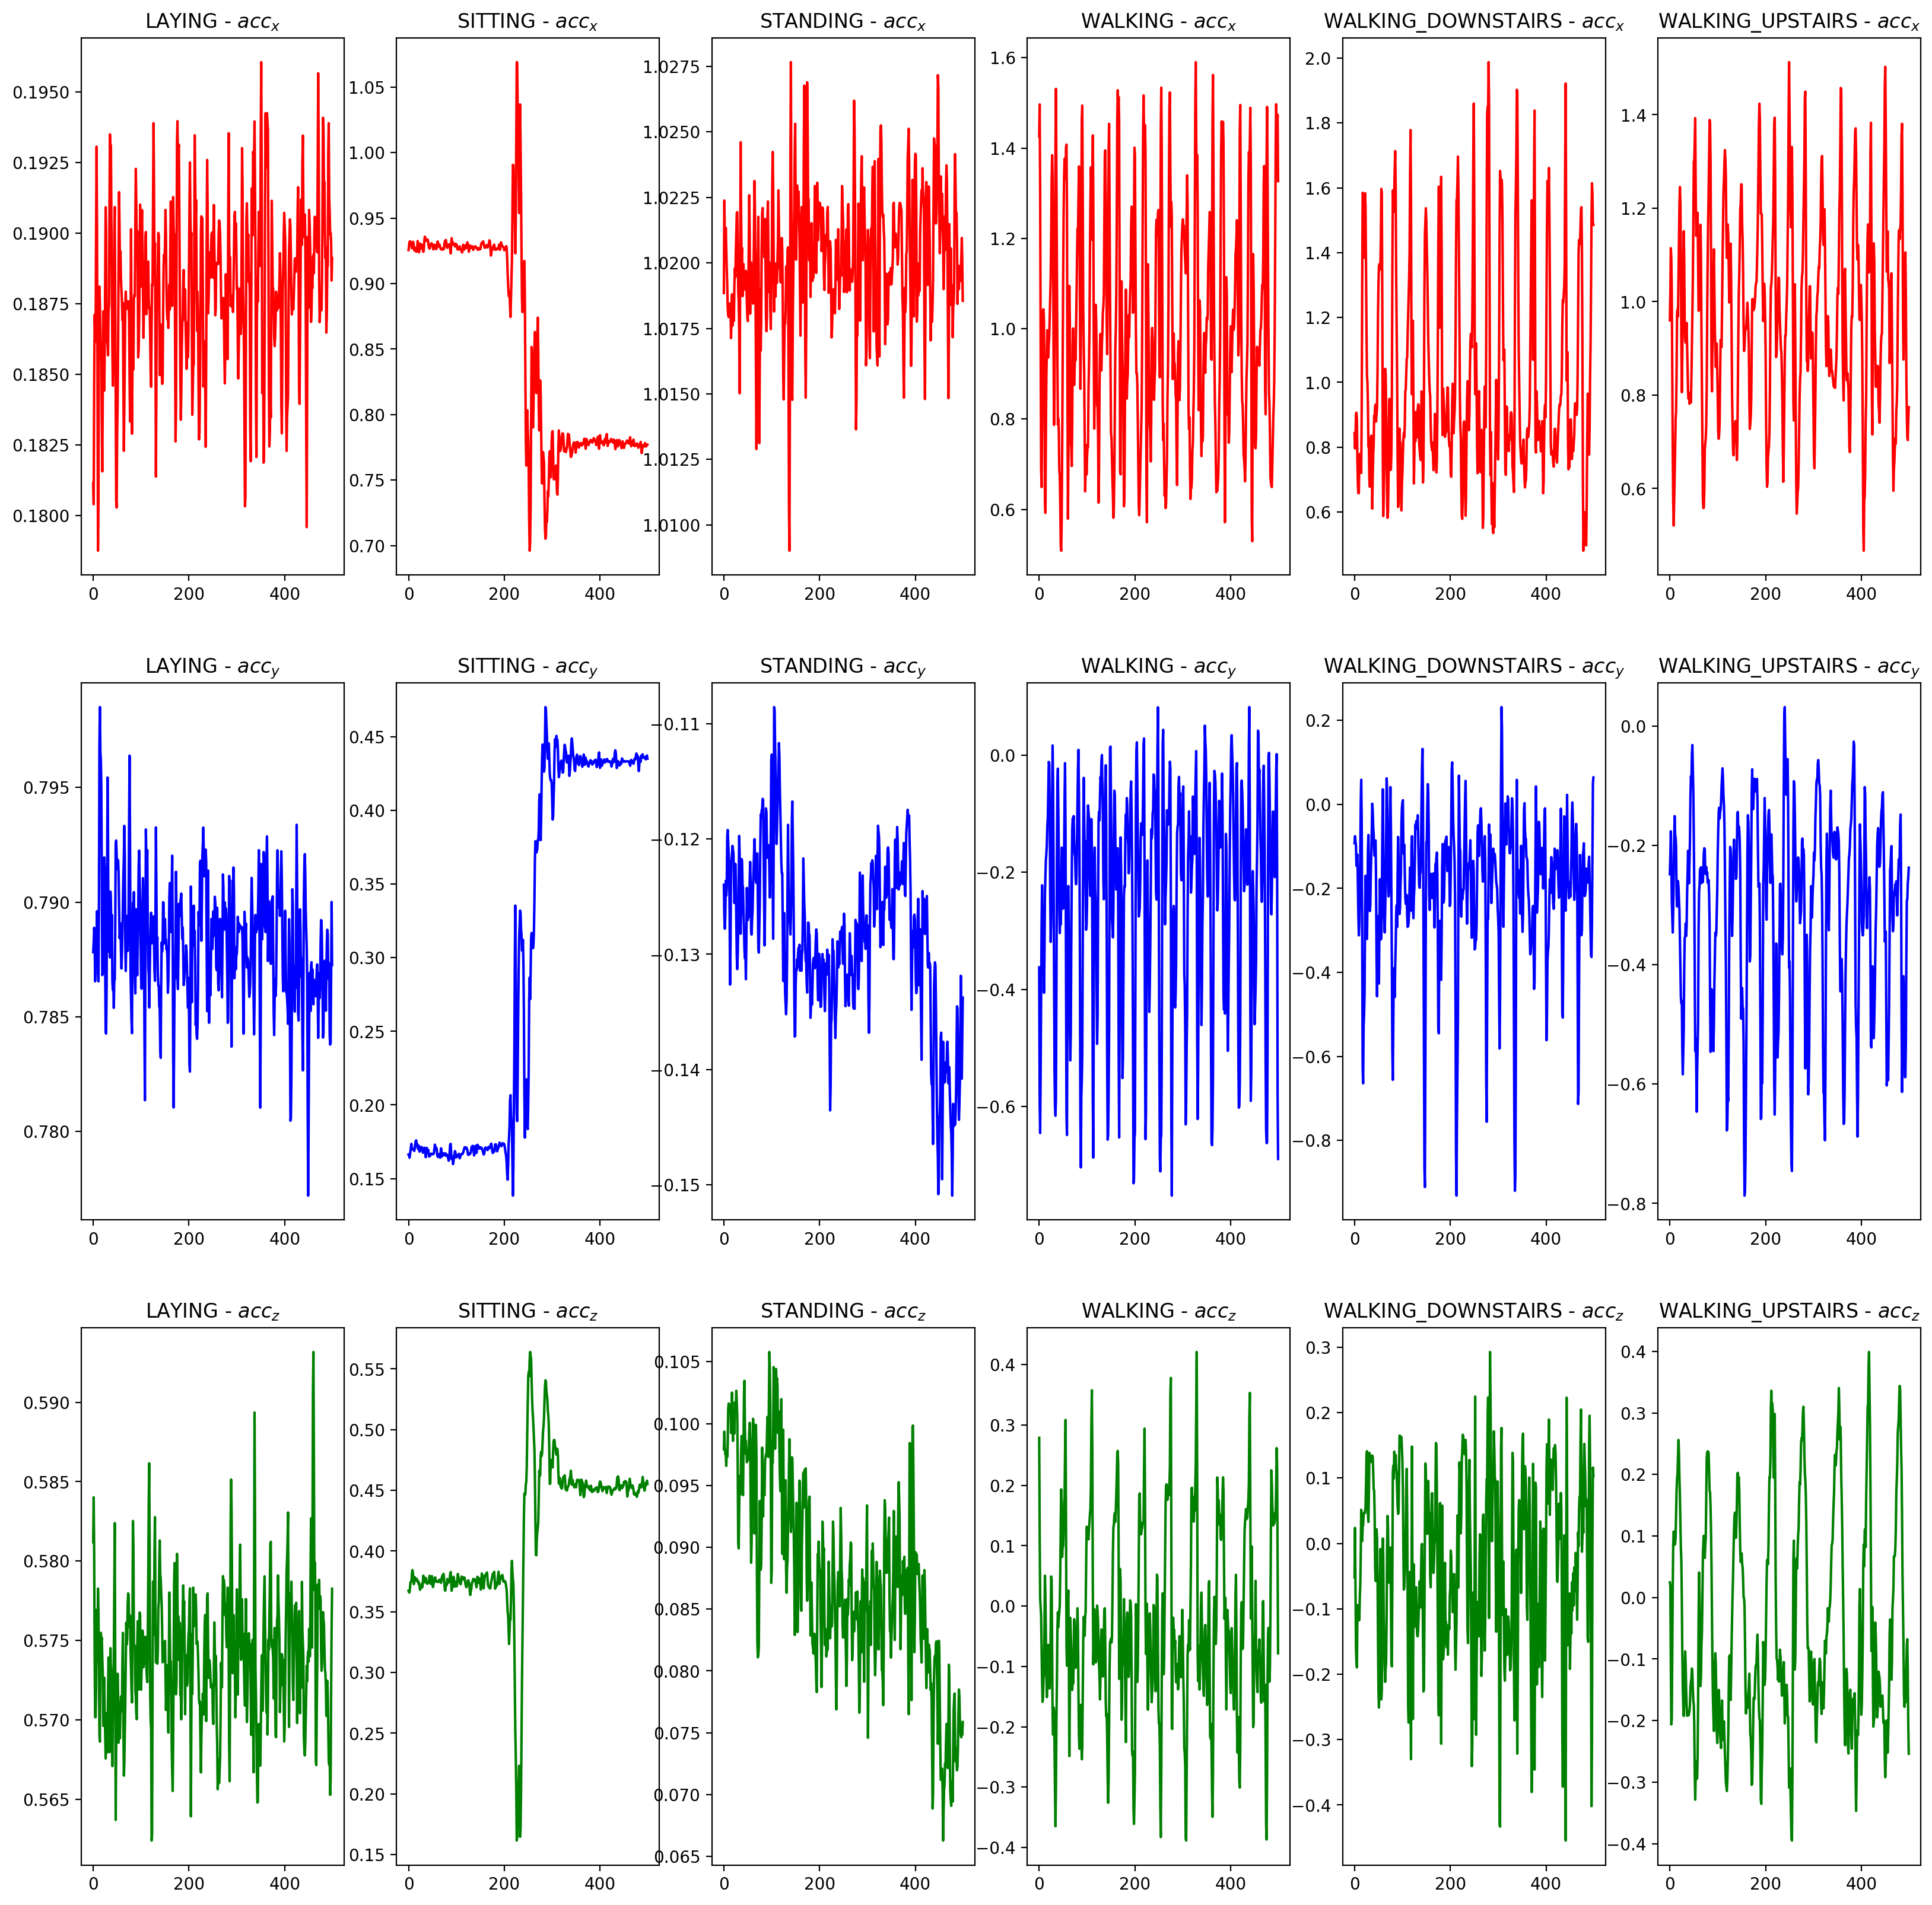

In [241]:
plt.figure(figsize=(20,20))
for i in range(6):
    activity = activities[i]
    data = x_train[i*21]
    acc_x = data[:,0]
    acc_y = data[:,1]
    acc_z = data[:,2]
    x = np.arange(0,500,1)
    plt.subplot(3,6,i+1)
    plt.plot(x,acc_x,c='r')
    plt.title(f"{activity} - $acc_x$")
    plt.subplot(3,6,i+7)
    plt.plot(x,acc_y,c='b')
    plt.title(f"{activity} - $acc_y$")
    plt.subplot(3,6,i+13)
    plt.plot(x,acc_z,c='g')
    plt.title(f"{activity} - $acc_z$")
plt.show()

Yes, there are evident differences between the accelerometer data of different activities. For instance, the variance in the acceleration values of dynamic activities like walking or climbing is much higher than that of the static activities like sitting, laying.

In [242]:
total_acceleration = x_train[:,:,0]**2 + x_train[:,:,1]**2 + x_train[:,:,2]**2
total_acceleration_x_test = x_test[:,:,0]**2 + x_test[:,:,1]**2 + x_test[:,:,2]**2
for i in range(len(activities)):
    activity=activities[i]
    var_ = total_acceleration[i*21:(i+1)*21].var()
    mean_ = total_acceleration[i*21:(i+1)*21].mean()
    print(f"Mean total acceleration for activity {activity} = {mean_}")
    print(f"Mean total acceleration for activity {activity} = {var_}")

Mean total acceleration for activity LAYING = 1.0103142450756741
Mean total acceleration for activity LAYING = 0.00046204993741151107
Mean total acceleration for activity SITTING = 1.029346570214143
Mean total acceleration for activity SITTING = 0.0005658598040530853
Mean total acceleration for activity STANDING = 1.0650814326336357
Mean total acceleration for activity STANDING = 0.00027748397579156124
Mean total acceleration for activity WALKING = 1.1545508057464684
Mean total acceleration for activity WALKING = 0.25233633148708084
Mean total acceleration for activity WALKING_DOWNSTAIRS = 1.227920255515466
Mean total acceleration for activity WALKING_DOWNSTAIRS = 0.8607093928038053
Mean total acceleration for activity WALKING_UPSTAIRS = 1.1661549538347427
Mean total acceleration for activity WALKING_UPSTAIRS = 0.36599943016717296


In [243]:
total_acceleration.shape

(126, 500)

In [244]:
total_acceleration_test = x_test[:,:,0]**2 + x_test[:,:,1]**2 + x_test[:,:,2]**2
print(total_acceleration_test.shape)

(54, 500)


# Question 2
There are many evident differences between the accelerometer data of static and dynamic actitvites. Therefore, we can  classify the activities by setting some threshold values for classifying based on the variance of the data. 

In [245]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(total_acceleration)
pca_data = pca.transform(total_acceleration)
pca_data.shape


(126, 2)

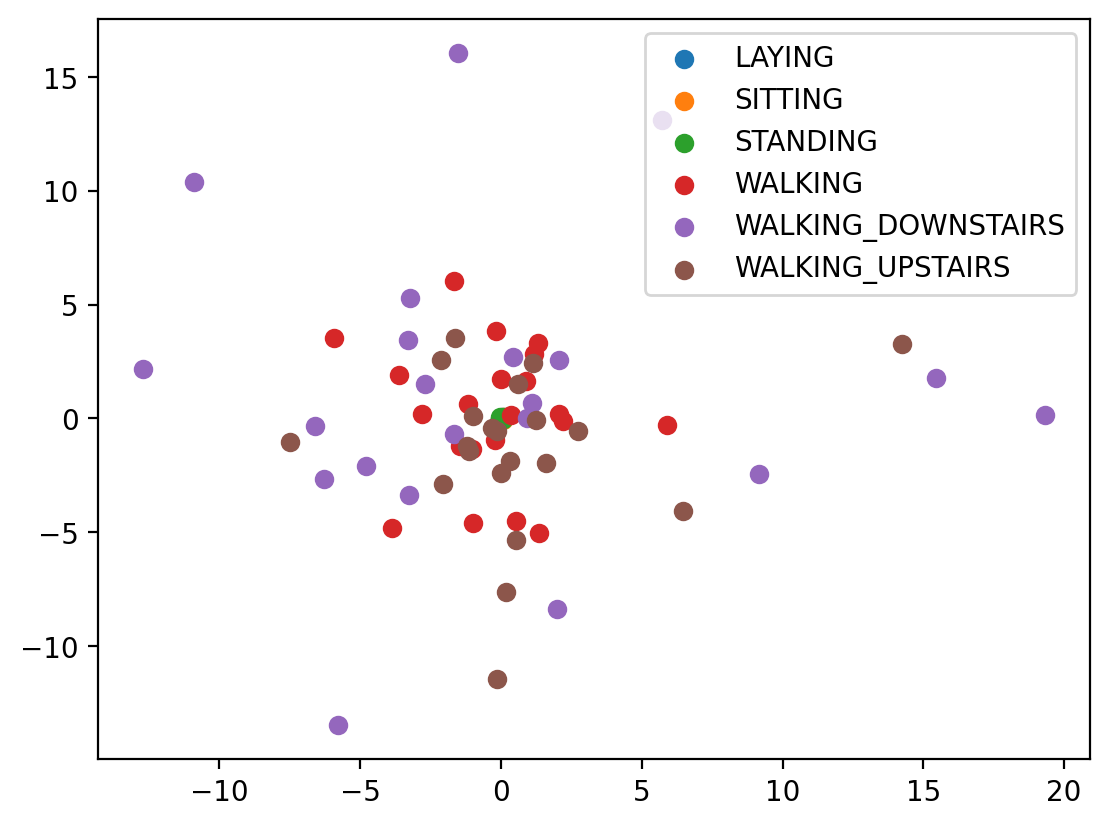

In [246]:

for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(pca_data[i*21:(i+1)*21,0],pca_data[i*21:(i+1)*21,1],label=activity)
    plt.legend()

In [247]:
import tsfel
from tsfel.feature_extraction.features import calc_mean, calc_var, pk_pk_distance, mean_abs_deviation, auc, autocorr

In [248]:
def extract_features(data):
    tsfel_features=[]
    for i in range(len(data)):
        mean = calc_mean(data[i])
        var = calc_var(data[i])
        dist = pk_pk_distance(data[i])
        mad = mean_abs_deviation(data[i])
        corr = autocorr(data[i])
        auc_ = auc(data[i],50)
        tsfel_features.append([mean,var,dist,mad,corr,auc_])
    return tsfel_features


In [249]:
tsfel_features_train=np.array(extract_features(total_acceleration))
tsfel_features_test=np.array(extract_features(total_acceleration_test))

In [250]:
print(tsfel_features_train.shape)
print(tsfel_features_test.shape)

(126, 6)
(54, 6)


In [251]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(tsfel_features_train)
tsfel_pca_data = pca.transform(tsfel_features_train)
tsfel_pca_data.shape

(126, 2)

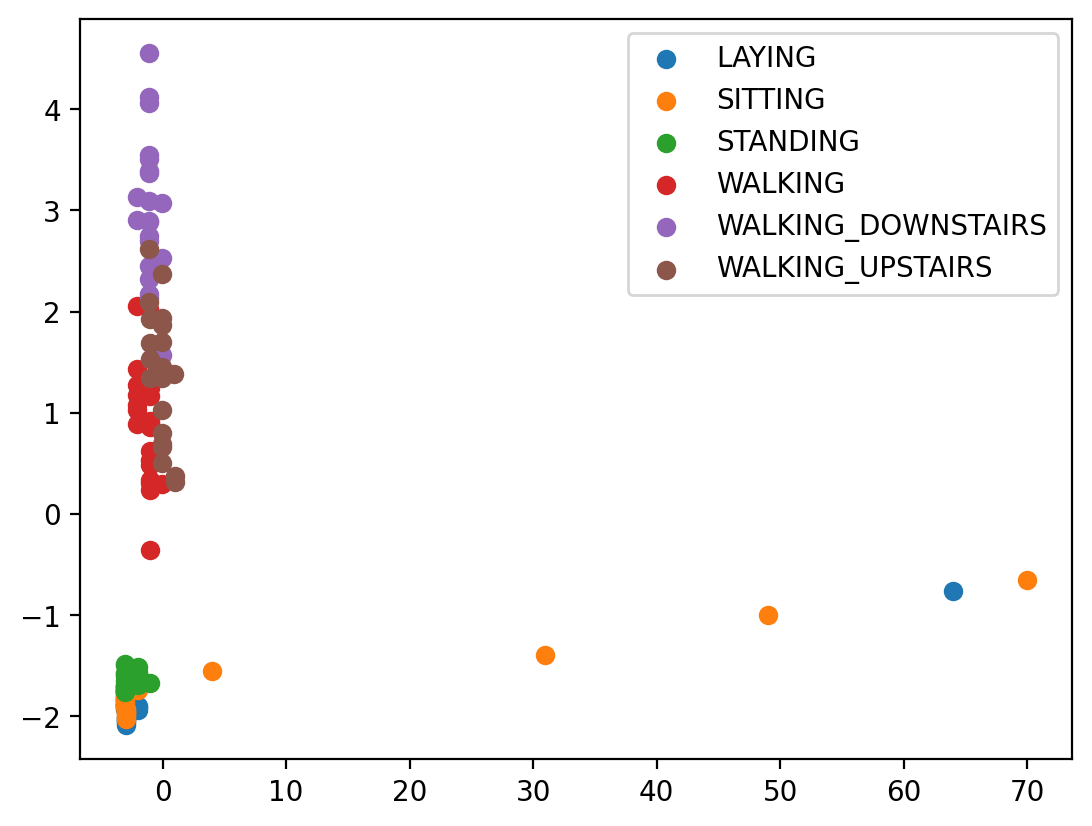

In [252]:
for i in range(len(activities)):
    activity = activities[i]
    plt.scatter(tsfel_pca_data[i*21:(i+1)*21,0],tsfel_pca_data[i*21:(i+1)*21,1],label=activity)
    plt.legend()

### Task 1, Question 1, Part 3

In [253]:
X_train_features = np.loadtxt('D:/IIT Gandhinagar/Sem 3/ML/ES335_Assignment1/HAR/UCI HAR Dataset/train/X_train.txt')
X_train_features.shape

(7352, 561)

In [254]:
y_train_features = np.loadtxt('D:/IIT Gandhinagar/Sem 3/ML/ES335_Assignment1/HAR/UCI HAR Dataset/train/y_train.txt')
y_train_features.shape

(7352,)

In [255]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X_train_features)
X_train_pca_data = pca.transform(X_train_features)
X_train_pca_data.shape

(7352, 2)

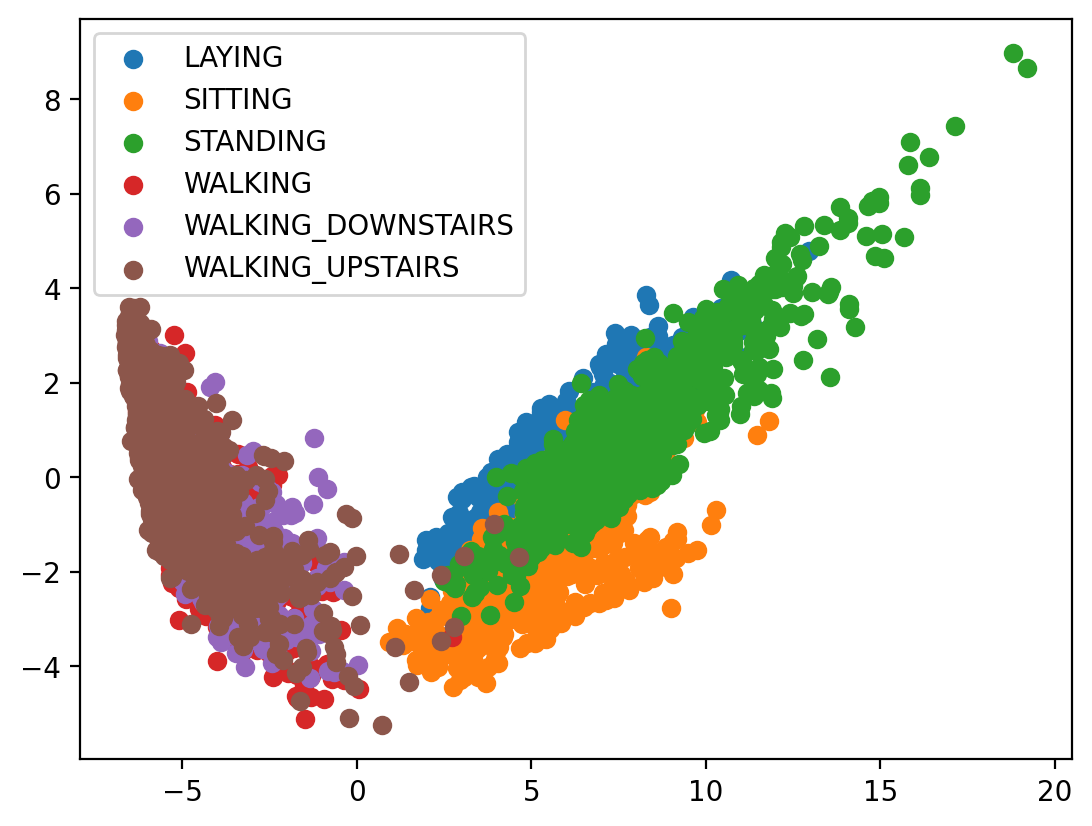

In [256]:
for i in range(1,7):
    plt.scatter(X_train_pca_data[y_train_features==i,0],X_train_pca_data[y_train_features==i,1],label=activities_map[i])
    plt.legend()
    

## Decision Tree below

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

Accuracy = 0.5185185185185185
Precision = 0.5293350168350168
Recall = 0.5185185185185185
F1 Score = 0.5128067781318555


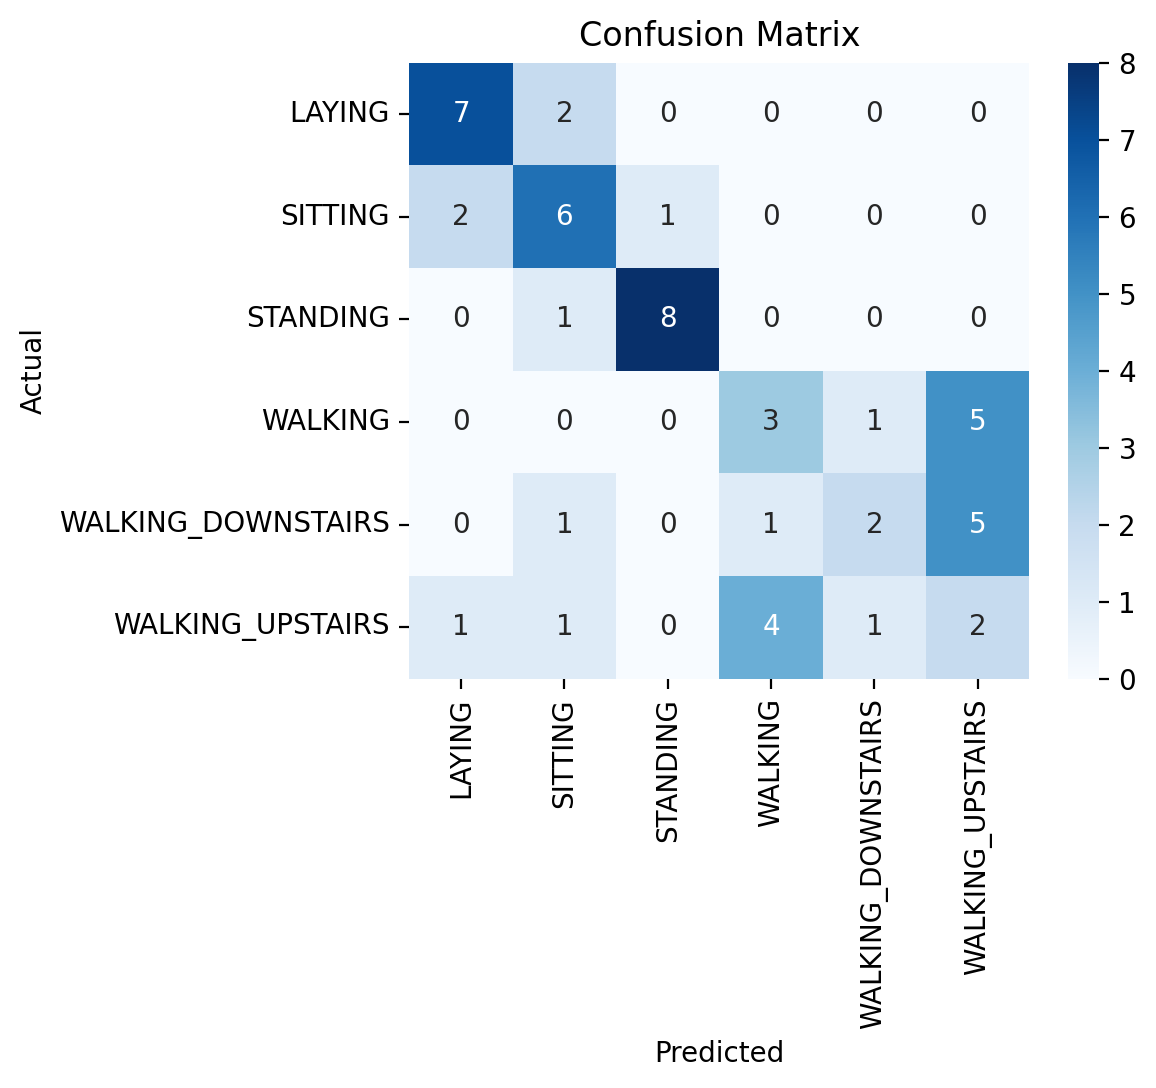

In [258]:
raw_data_tree = DecisionTreeClassifier()
raw_data_tree.fit(total_acceleration,y_train)
y_pred = raw_data_tree.predict(total_acceleration_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Precision = {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test,y_pred,average='weighted')}")
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy = 0.7592592592592593
Precision = 0.766955266955267
Recall = 0.7592592592592593
F1 Score = 0.7569444444444444


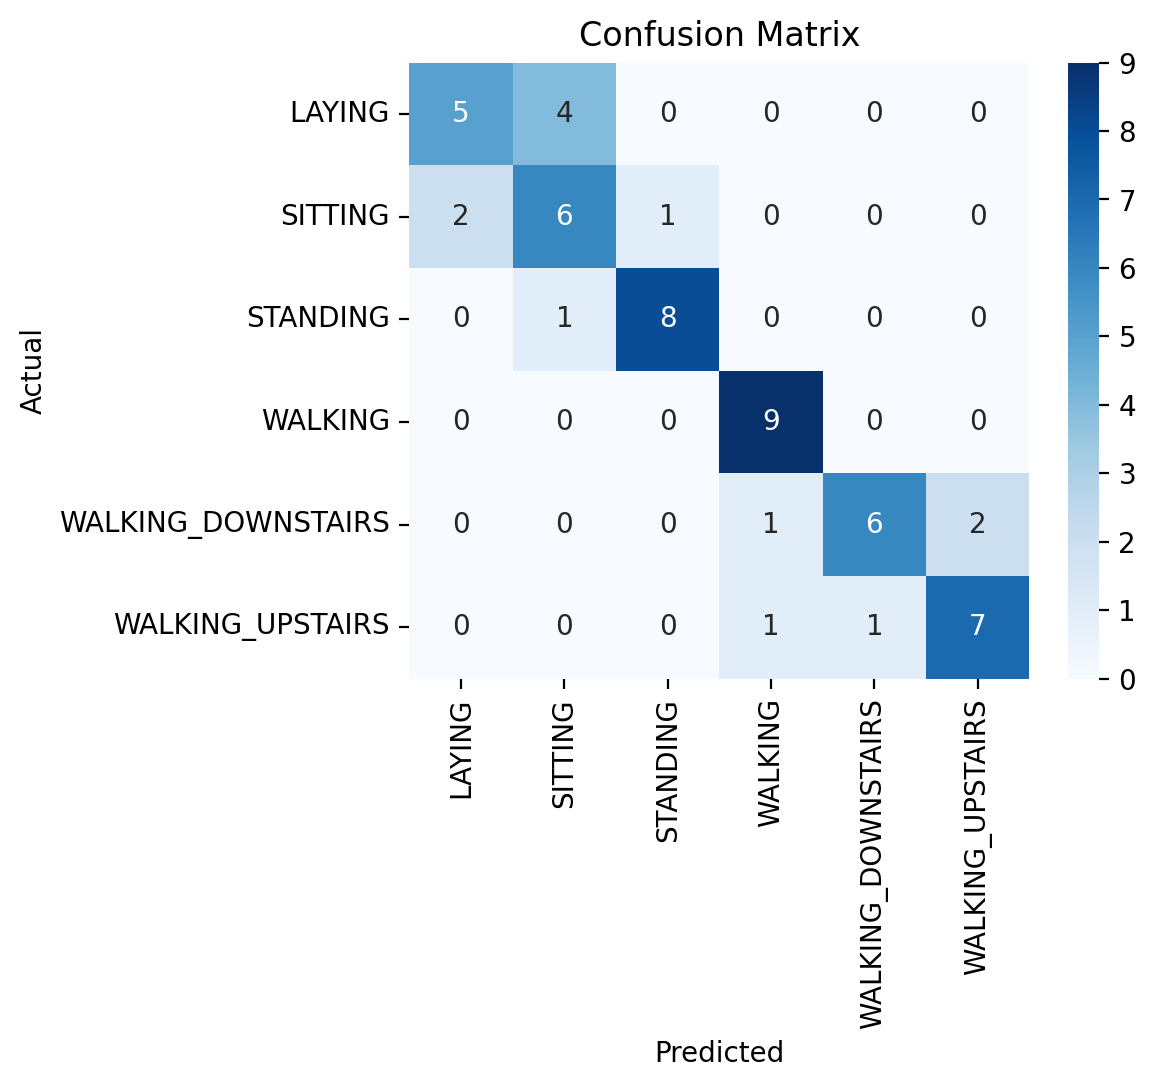

In [259]:
tsfel_tree = DecisionTreeClassifier()
tsfel_tree.fit(tsfel_features_train,y_train)
y_pred = tsfel_tree.predict(tsfel_features_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Precision = {precision_score(y_test,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test,y_pred,average='weighted')}")
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [260]:
X_test_features = np.loadtxt('D:/IIT Gandhinagar/Sem 3/ML/ES335_Assignment1/HAR/UCI HAR Dataset/test/X_test.txt')
X_test_features.shape

(2947, 561)

In [261]:
y_test_features = np.loadtxt('D:/IIT Gandhinagar/Sem 3/ML/ES335_Assignment1/HAR/UCI HAR Dataset/test/y_test.txt')
y_test_features.shape

(2947,)

Accuracy = 0.8554462164913471
Precision = 0.8562845932264699
Recall = 0.8554462164913471
F1 Score = 0.8548592376222387


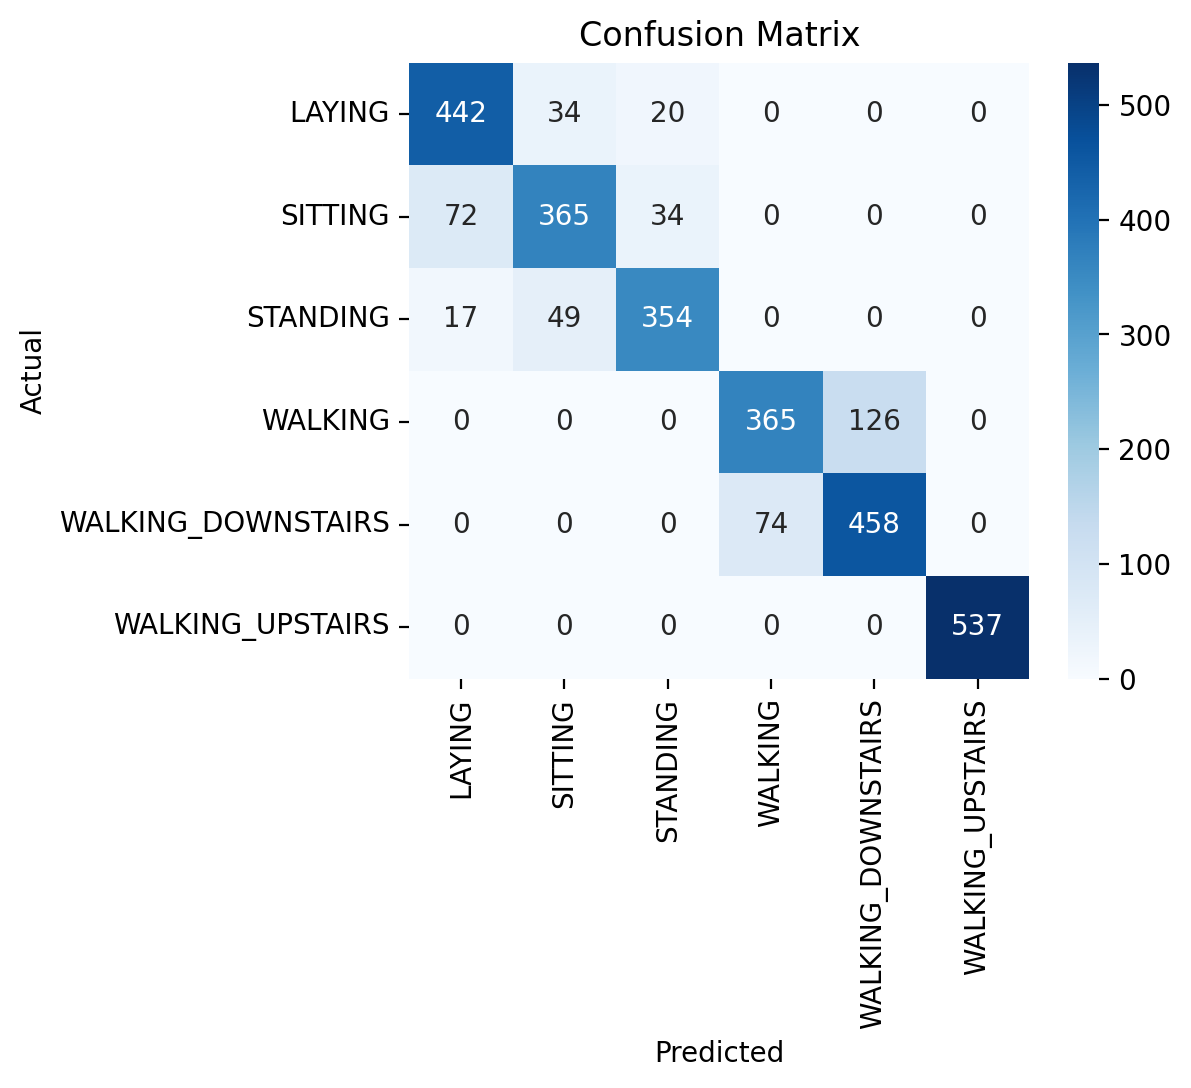

In [262]:
features_tree = DecisionTreeClassifier()
features_tree.fit(X_train_features,y_train_features)
y_pred = features_tree.predict(X_test_features)
print(f"Accuracy = {accuracy_score(y_test_features,y_pred)}")
print(f"Precision = {precision_score(y_test_features,y_pred,average='weighted')}")
print(f"Recall = {recall_score(y_test_features,y_pred,average='weighted')}")
print(f"F1 Score = {f1_score(y_test_features,y_pred,average='weighted')}")
cm = confusion_matrix(y_test_features,y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=activities, yticklabels=activities, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

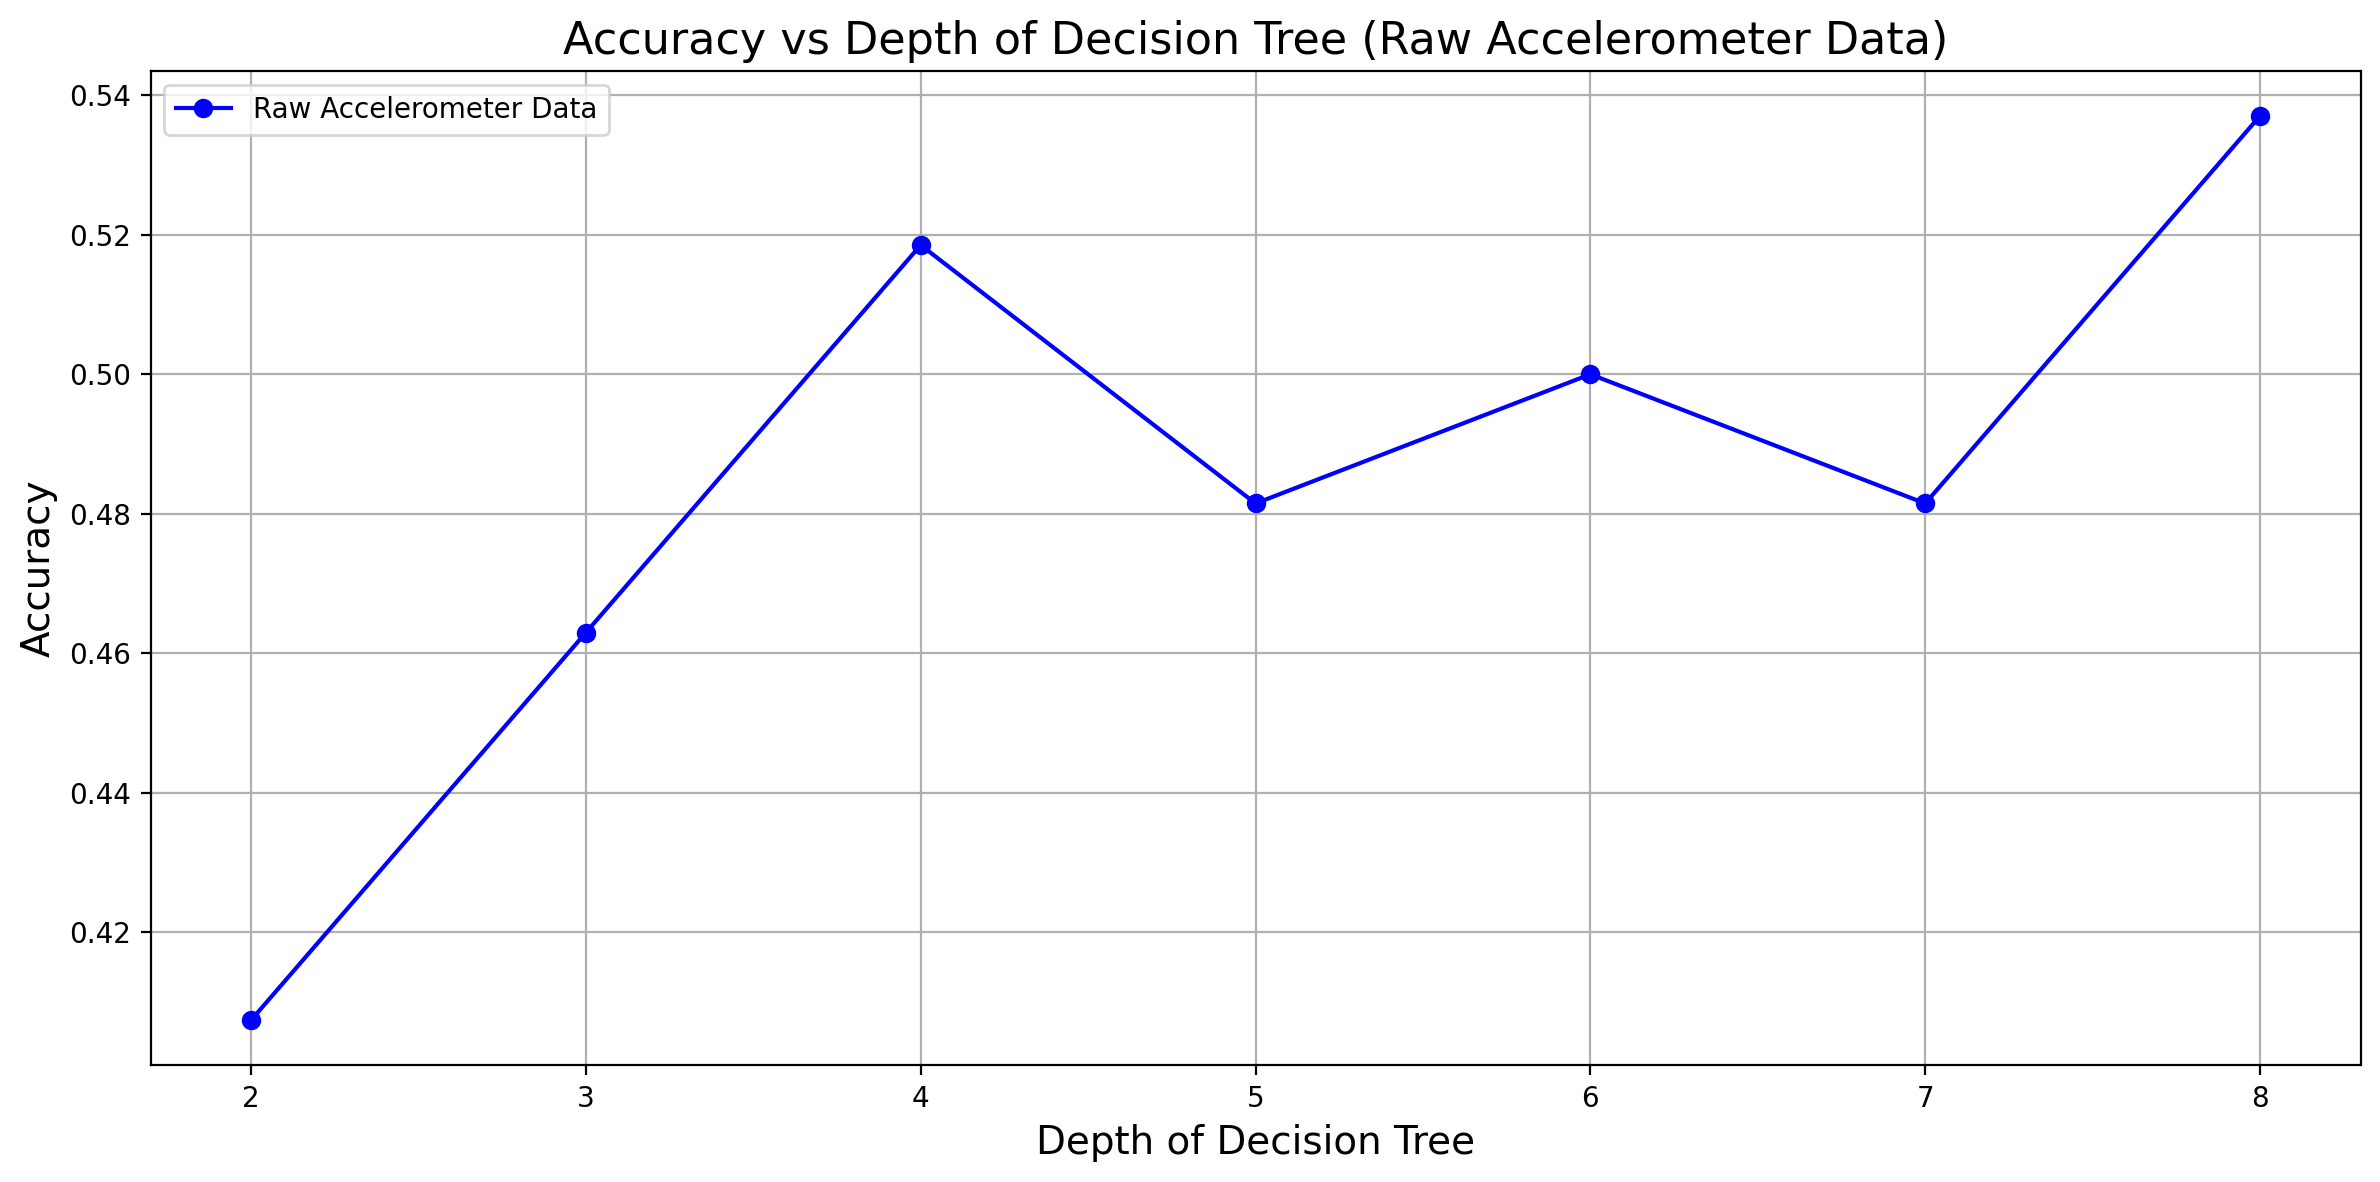

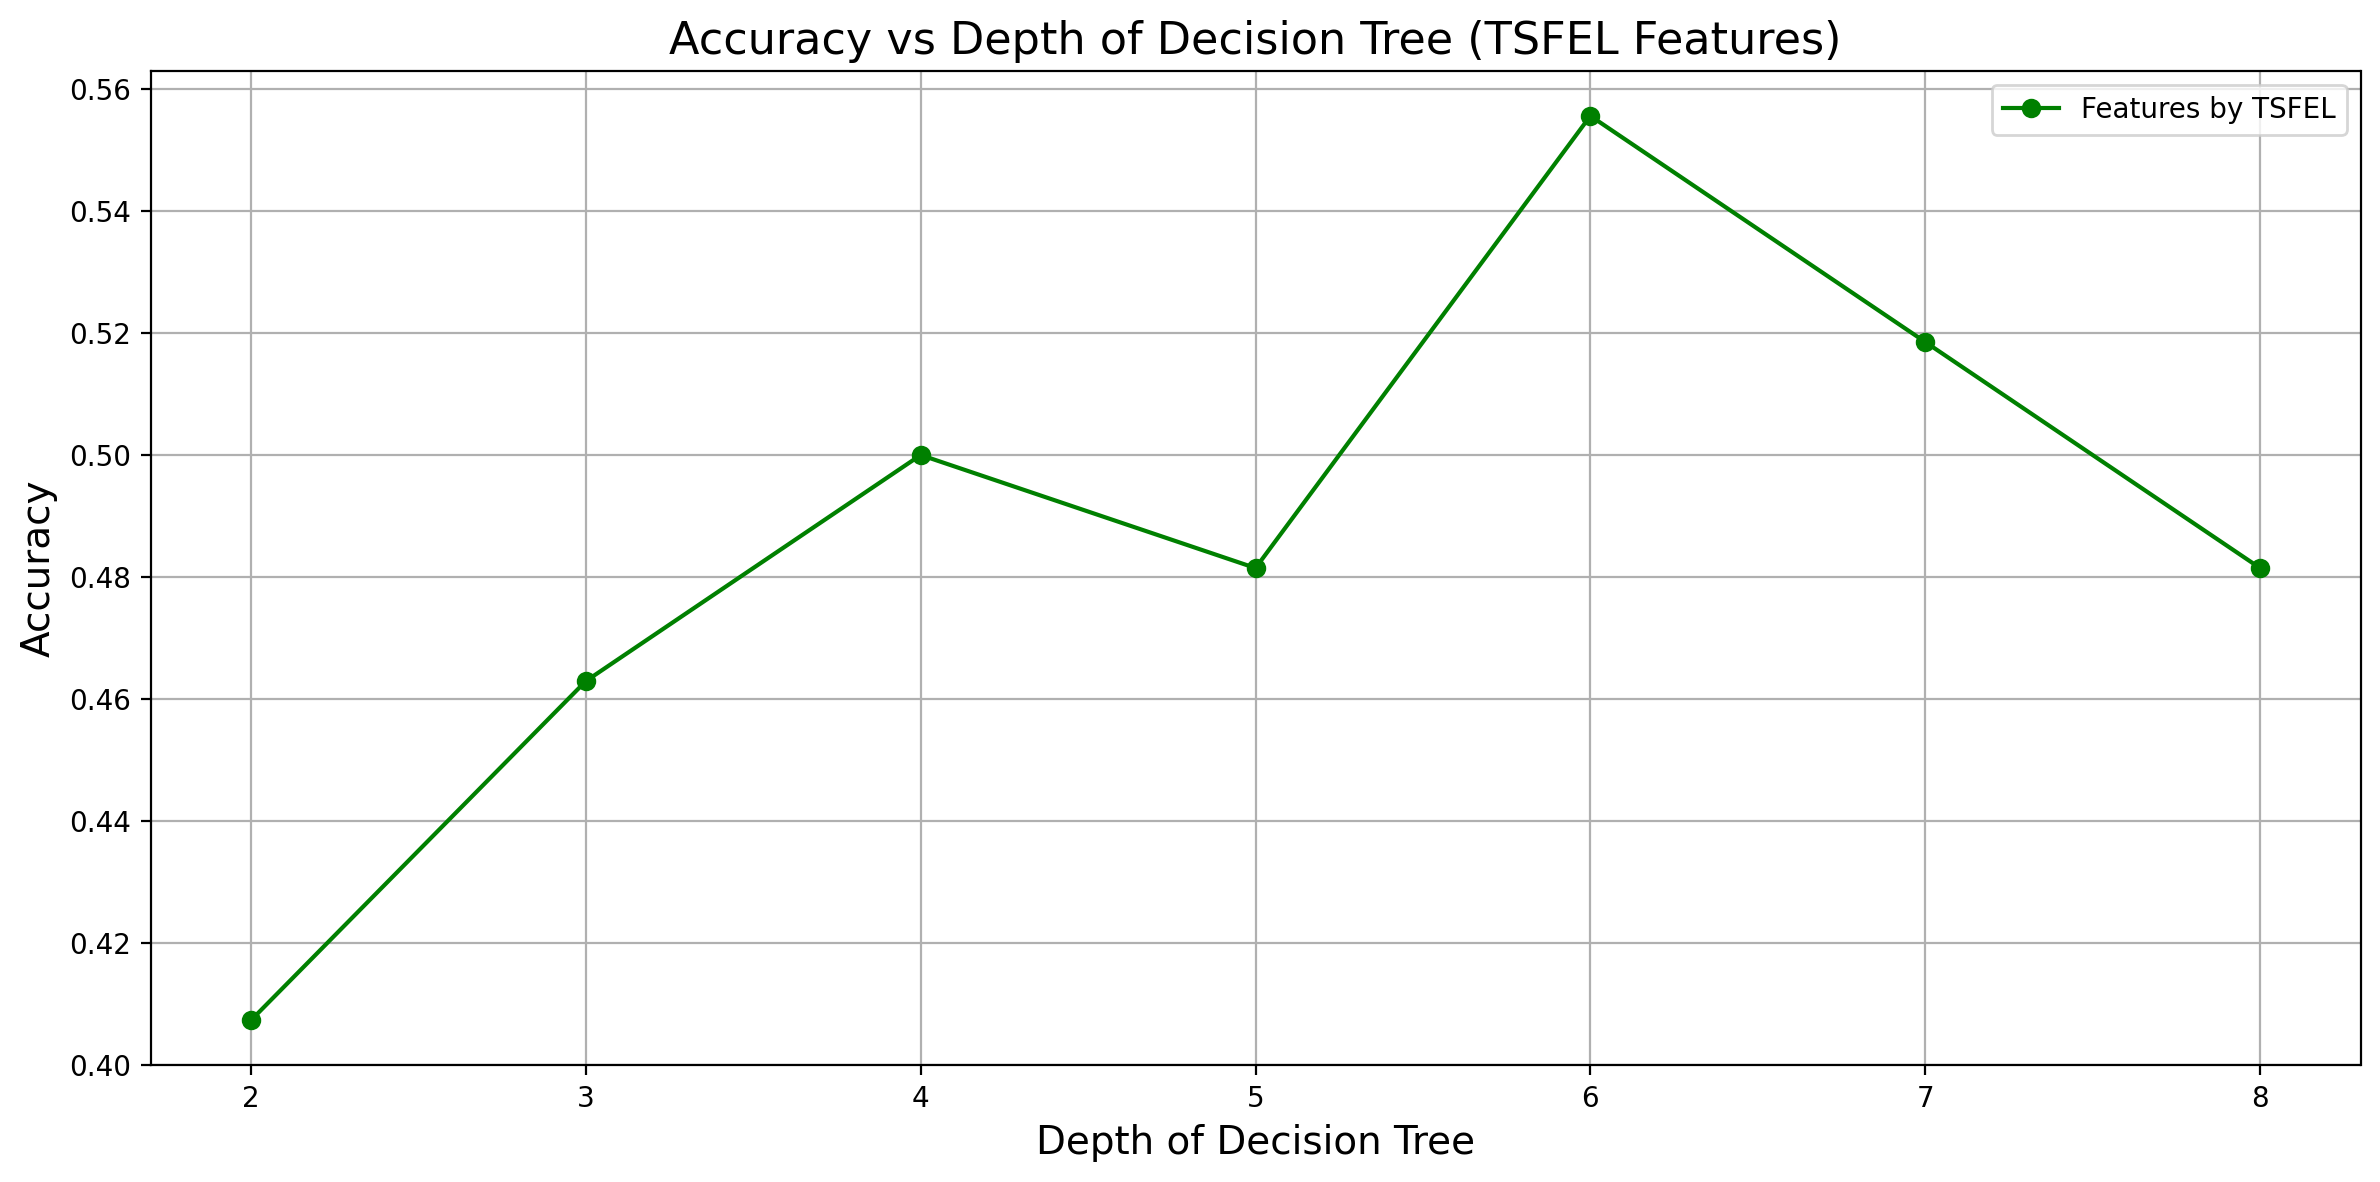

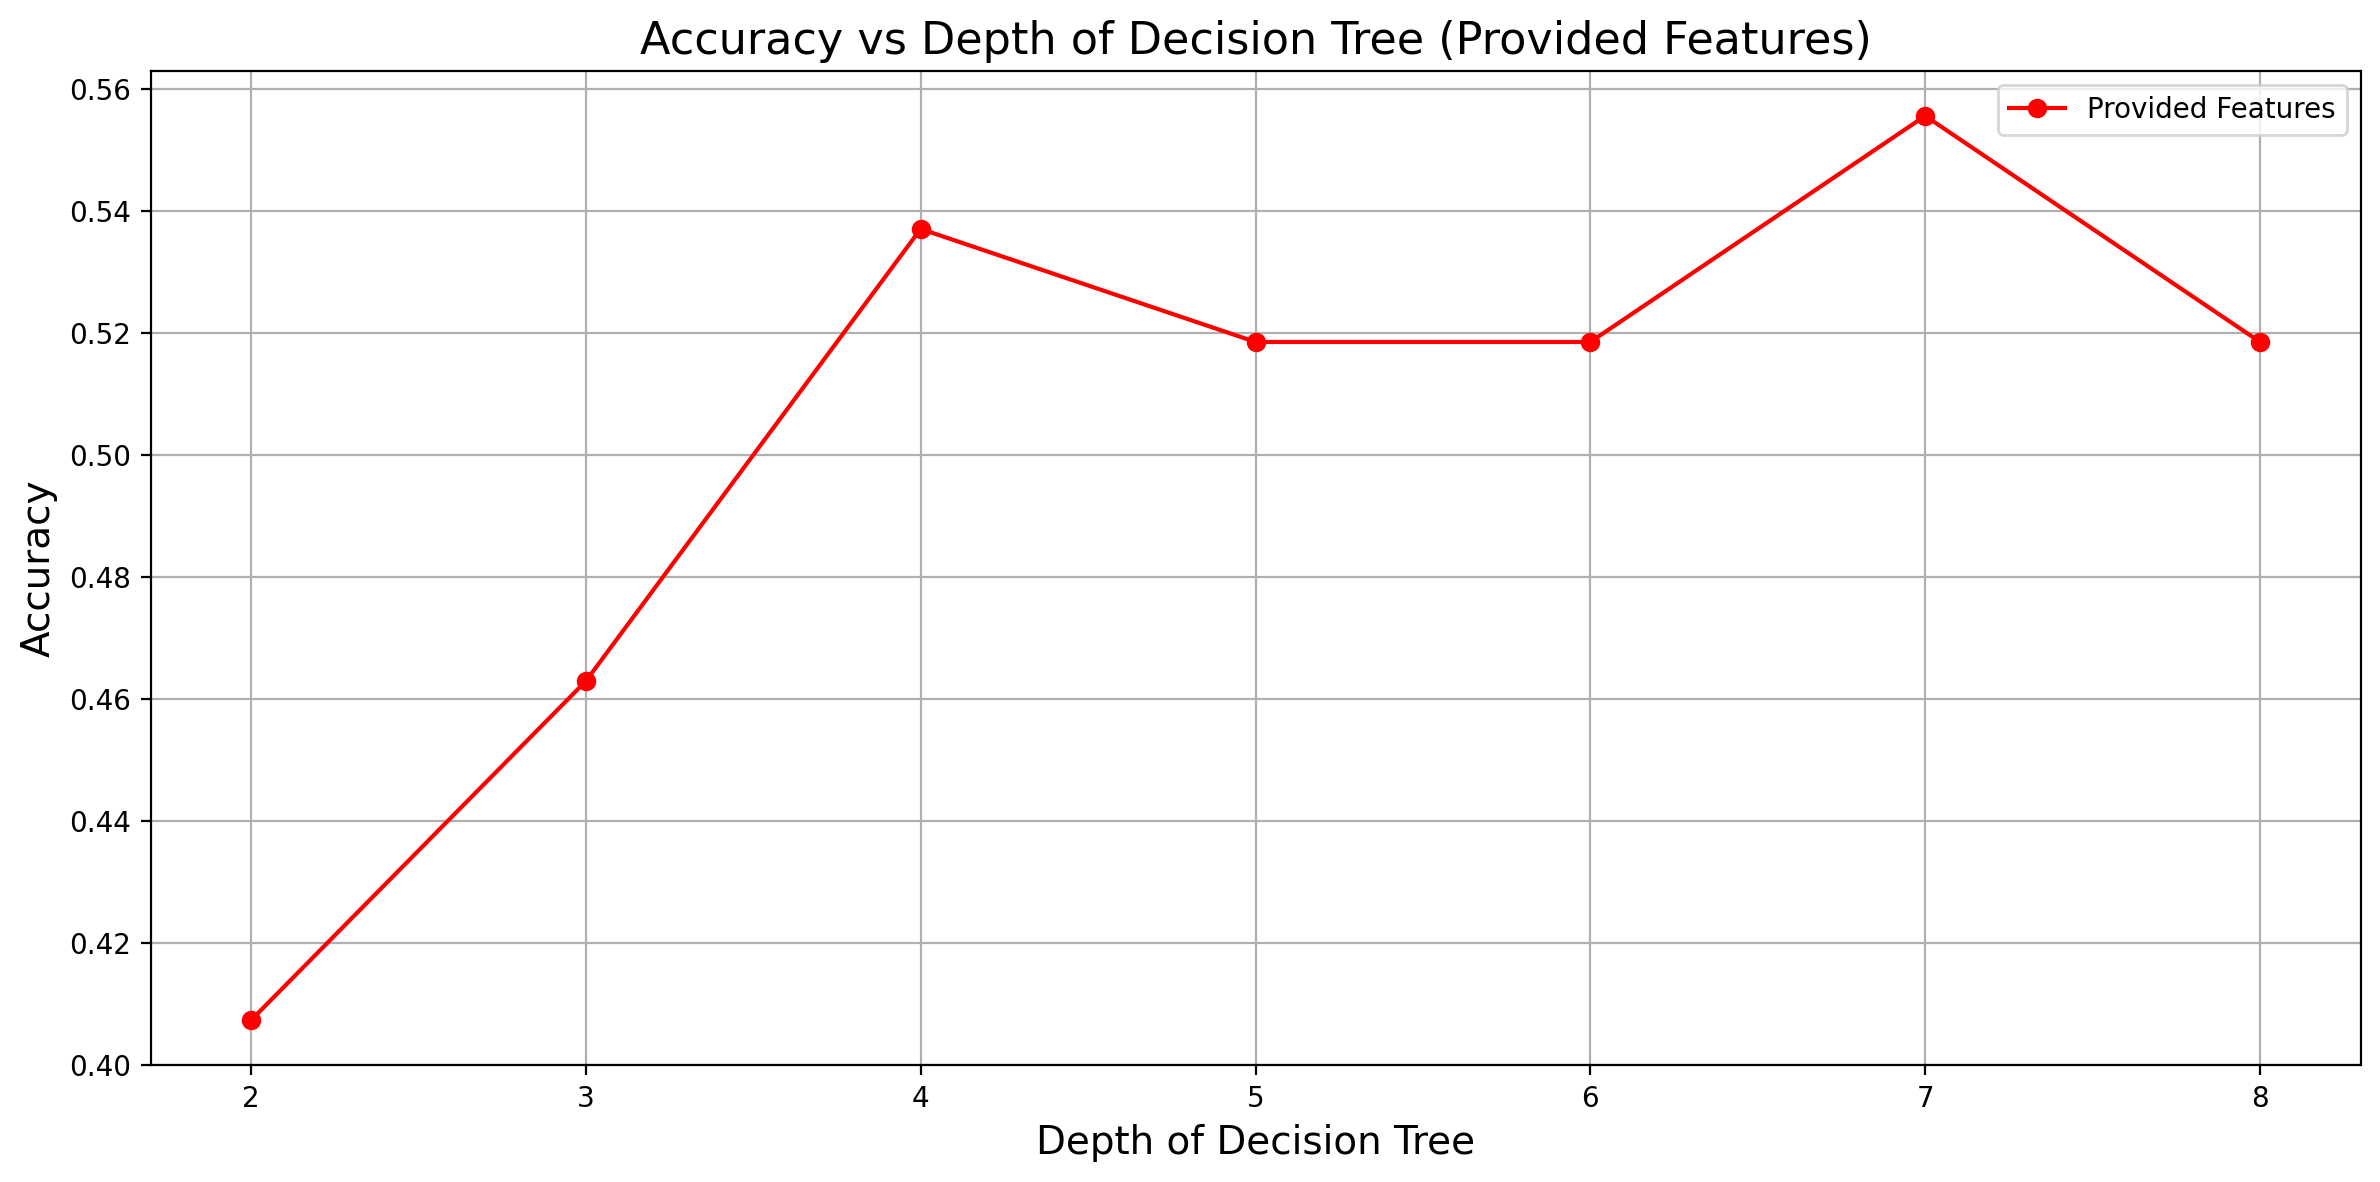

In [266]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depths = range(2, 9)
accuracies_raw = []
accuracies_tsfel = []
accuracies_features = []

# Train and evaluate Decision Tree with raw accelerometer data
for depth in depths:
    raw_tree = DecisionTreeClassifier(max_depth=depth)
    raw_tree.fit(total_acceleration, y_train)

    y_predict_raw = raw_tree.predict(total_acceleration_x_test)
    accuracies_raw.append(accuracy_score(y_test, y_predict_raw))

# Plot accuracy vs depth for raw accelerometer data
plt.figure(figsize=(12, 6))
plt.plot(depths, accuracies_raw, marker='o', linestyle='-', color='b', label='Raw Accelerometer Data')
plt.xlabel('Depth of Decision Tree', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Depth of Decision Tree (Raw Accelerometer Data)', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Train and evaluate Decision Tree with TSFEL features
for depth in depths:
    tsfel_tree = DecisionTreeClassifier(max_depth=depth)
    tsfel_tree.fit(total_acceleration, y_train)

    y_predict_tsfel = tsfel_tree.predict(total_acceleration_x_test)
    accuracies_tsfel.append(accuracy_score(y_test, y_predict_tsfel))

# Plot accuracy vs depth for features obtained by TSFEL
plt.figure(figsize=(12, 6))
plt.plot(depths, accuracies_tsfel, marker='o', linestyle='-', color='g', label='Features by TSFEL')
plt.xlabel('Depth of Decision Tree', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Depth of Decision Tree (TSFEL Features)', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Train and evaluate Decision Tree with provided features
for depth in depths:
    features_tree = DecisionTreeClassifier(max_depth=depth)
    features_tree.fit(total_acceleration, y_train)

    y_predict_features = features_tree.predict(total_acceleration_x_test)
    accuracies_features.append(accuracy_score(y_test, y_predict_features))

# Plot accuracy vs depth for provided features
plt.figure(figsize=(12, 6))
plt.plot(depths, accuracies_features, marker='o', linestyle='-', color='r', label='Provided Features')
plt.xlabel('Depth of Decision Tree', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy vs Depth of Decision Tree (Provided Features)', fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
